In [7]:
from py2cytoscape import cyrest
import pandas as pd

%run utils/cyto_to_shapely_node_util.ipynb
%run utils/cyto_to_shapely_edge_util.ipynb
%run utils/full_cyto_to_shapely_util.ipynb
%run utils/network_score_util.ipynb

BASE_URL = 'http://localhost:1234/v1/'
cy = cyrest.cyclient()

MIN_PARAMETER_VALUE = -3500
MAX_PARAMETER_VALUE = 100
STEP = 1

X_LIM_RANGE_MAX = 16000
Y_LIM_RANGE_MAX = 5000

In [8]:
#Set up
network_suid = str(cy.network.get_attribute(
    columnList='SUID',
    network='CURRENT'
)[0]['SUID'])
view_suid = str(requests.get(BASE_URL + 'networks/views/currentNetworkView').json()['data']['networkViewSUID'])

dataframe = pd.DataFrame()
data = []

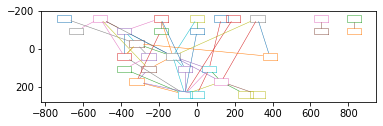

In [9]:
#Apply new layout to network and get new score
for i in range(MIN_PARAMETER_VALUE, MAX_PARAMETER_VALUE + 1, STEP):
    cy.layout.hierarchical(network='SUID:' + str(network_suid), componentSpacing=str(i))
    new_data = network_score(
        network_suid, 
        view_suid, 
        X_LIM_RANGE_MAX,
        Y_LIM_RANGE_MAX,
        edge_direction='up'
    )
    data.append([i] + new_data)

In [10]:
dataframe = dataframe.append(data)
dataframe.columns = ['HorizontalSpacing', 
                                  'EdgeCrossings', 
                                  'NodeOverlaps',
                                  'NodeEdgeOverlaps',
                                  'EdgeLength', 
                                  'NodeDistance', 
                                  'NodeEdgeDistance', 
                                  'DownwardEdge']
dataframe.to_csv()

',HorizontalSpacing,EdgeCrossings,NodeOverlaps,NodeEdgeOverlaps,EdgeLength,NodeDistance,NodeEdgeDistance,DownwardEdge\n0,35,0.9583718778908418,0.993103448275862,0.986322188449848,0.8683214031398425,0.015020225835765089,0.010862545702413101,0.9148936170212766\n'